### Statistical Learning


You may be more used to performing calculations where you have a known formula and you wish to use some **input** to calculate an **output**.

For example, you might be calculating the force of an object

$$f = ma$$

In [1]:
###### Define a function for calculating force

def force(mass, acceleration):
    return mass * acceleration

In [2]:
###### Calculate the force on an object given mass and acceleration

m = 10
a = 9.8

force(m,a)

Statistical learning is different. Here, we are given the inputs and outputs:

- $X$ / input / features
- $y$ / output / target

We make an assumption that there is some function $f$ such that

$$y=f(X)+\varepsilon$$

Note:

1. X is often a vector
1. $\varepsilon$ is the "error term" and represents both known and unknown sources of noise

From a known $X$ and $y$ we seek the formula or function, $f$, that best describes the relatioship between them.

This can be trivial. 

In [3]:
###### Core imports for numerical computing in Python

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [4]:
###### Define $x$ and $y$

x = [-1,3]
y = [3,5]

Here, we have two $x$ values and two $y$ values. It is trivial to find a formula describing the relationship between $x$ and $y$.

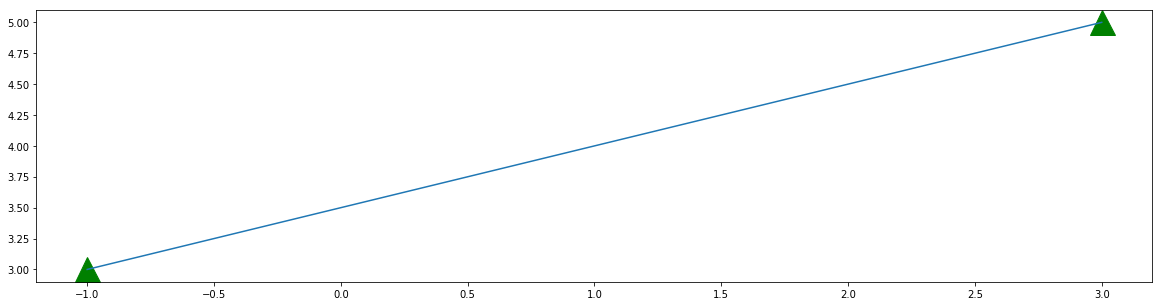

In [5]:
###### Plot the line defining the relationship between $x$ and $y$

fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.plot(x[0], y[0], 'g^', ms=25)
ax.plot(x[1], y[1], 'g^', ms=25)
ax.plot((x[0], y[0]), (x[1], y[1]))
plt.show()

This is a perfectly determined system. We have two variables and two data points i.e. $n=p$.

The situation is more complicated when $n\neq p$. 

In [6]:
###### Add more values to $x$ and $y$

x += [0,1,2]
y += [3.25, 4, 4.75]

points = [
    (x[0], y[0]),
    (x[1], y[1]),
    (x[2], y[2]),
    (x[3], y[3]),
    (x[4], y[4])
]

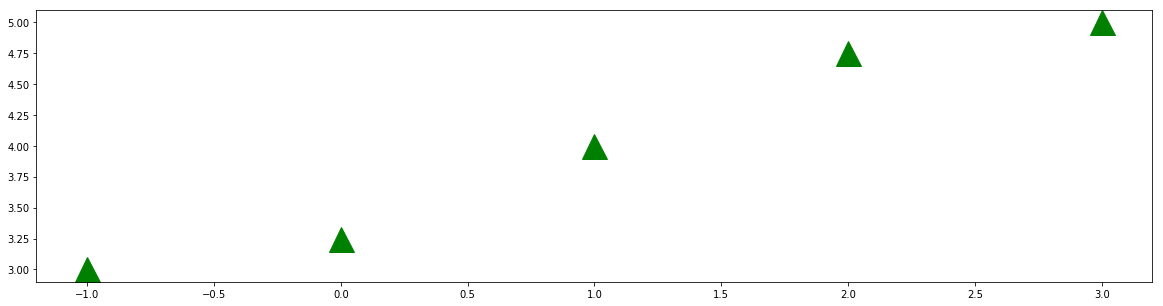

In [7]:
###### Plot new $x$ and $y$

fig, ax = plt.subplots(1,1,figsize=(20,5))

for point in points:
    ax.plot(*point, 'g^', ms=25)

plt.show()

The line here does not fit perfectly. The system is **overdetermined** i.e. $n>p$.

#### The best $f$ aka $\widehat{f}$

We seek "the best" $f$, called $\widehat{f}$ or "eff hat".

We will quantify what "best" mean in terms of error. 

For $\widehat{y} = \widehat{f}(X)$, we consider the error over our data

$$\text{E}\left[(y-\widehat{y})^2\right] = \left[f(X)-\widehat{f}(X)\right]^2 + \text{Var}(\varepsilon)$$

#### Reasons to estimate $f$

1. Prediction
   - Given some new value for $X$, what would we expect $y$ to be?
2. Inference
   - Which features ($X_1, X_2, \dots$) are associated with the target $y$?
   - What is the relationship between the target $y$ and each feature ($X_1, X_2, \dots$)?
   - Can the relationship between the target $y$ and each feature be adequately summarized using a linear equation, or is the relationship more complicated?

In [8]:
###### Load Advertising data as a `DataFrame`

Advertising = pd.read_csv('data/Advertising.csv',
                          index_col=0)

#### Inference on Advertising Data

Here we create a series of **linear models** to help us make inferences. Linear models allow for relatively simple and interpretable inference, but may not yield as accurate predictions as some other approaches

/Users/joshuacook/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


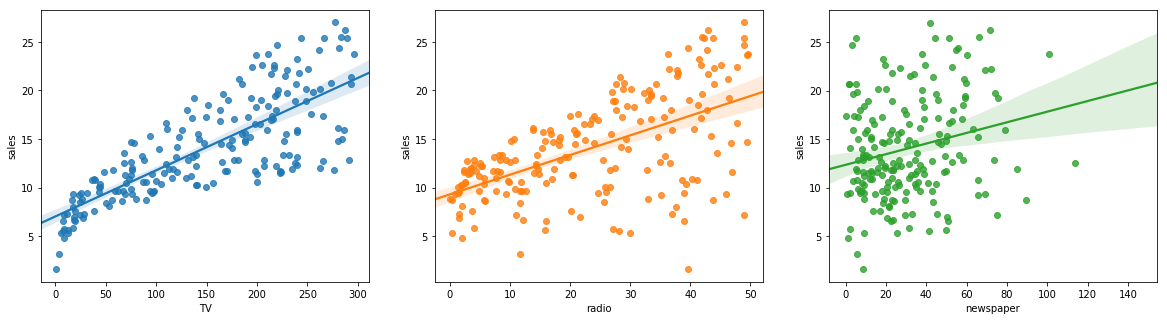

In [9]:
###### Plot the Advertising Data

fig, ax = plt.subplots(1,3,figsize=(20,5))

advertising_types = ['TV', 'radio', 'newspaper']

for i, feature in enumerate(advertising_types):

    sns.regplot(Advertising[feature], 
                Advertising['sales'], ax=ax[i])
    
plt.show()

- Which media contribute to sales?
- Which media generate the biggest boost in sales?
- How much increase in sales is associated with a given increase in TV advertising?

#### Parametric versus Non-Parametric

##### Parametric Models

1. We make an assumption about the functional form, or shape, of $f$.
2. After a model has been selected, we need a procedure that uses the training data to fit or train the model. 

The linear model is an important example of a parametric model. We consider 

$$\widehat{f}(X) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p$$

- A linear model is specified in terms of $p + 1$ parameters $\beta_0, \beta_1, \dots, \beta_p$
- We estimate the parameters by fitting the model to training data.
- Although it is almost never correct, a linear model often serves as a good and interpretable approximation to the unknown true function $f(X)$.
- the most common method to fitting linear models is the ordinary least squares (OLS) method

##### Non-Parametric Models

- Non-parametric methods do not make explicit assumptions about the functional form of $f$. 
- Any parametric approach brings with it the possibility that the functional form used to estimate $f$ is very different from the true $f$, in which case the resulting model will not fit the data well. 
- In contrast, non-parametric approaches completely avoid this danger, since essentially no assumption about the form of $f$ is made. 
- But non-parametric approaches do suffer from a major disadvantage: since they do not reduce the problem of estimating $f$ to a small number of parameters, a very large number of observations (far more than is typically needed for a parametric approach) is required in order to obtain an accurate estimate for $f$ ... **THE CURSE OF DIMENSIONALITY**.

K Nearest Neighbors is an important example of a non-parametric model.

#### Tradeoffs

##### The Trade-Off Between Overfitting and Underfitting

A potential disadvantage of a parametric approach is that the model we choose will usually not match the true unknown form of $f$. 

If the chosen model is too far from the true $f$, then our estimate will be poor. 

We can try to address this problem by choosing flexible models that can fit many different possible functional forms for $f$. 

In [10]:
###### Define correlated data with random noise

xx = np.linspace(-2,2,20)
yy = xx**3 + 2*np.random.random(20) + 100

In [11]:
###### Import the Linear Regression model from Scikit-Learn

from sklearn.linear_model import LinearRegression

In [12]:
###### Instantiate an instance of the Linear Regression model

lr = LinearRegression()

In [13]:
###### Fit the new Linear Regression model

lr.fit(xx.reshape(-1, 1), yy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
###### Display the coefficients and intercept of the fit model

lr.coef_, lr.intercept_

(array([2.83186003]), 100.95322073455777)

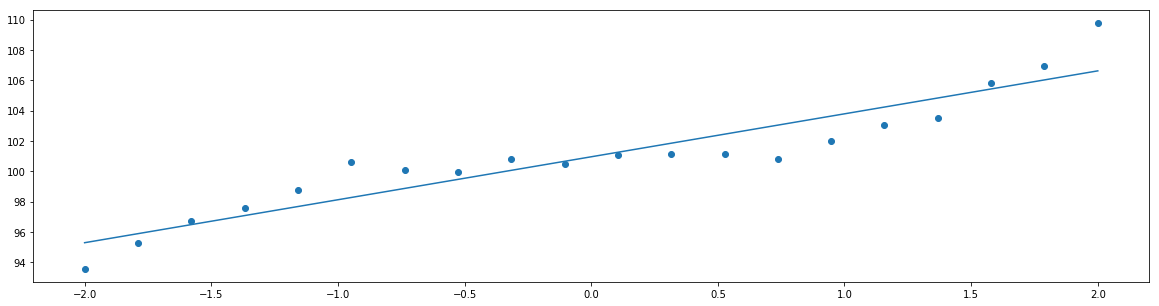

In [15]:
###### Plot the line of best fit 

fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.scatter(xx, yy)
ax.plot(xx, xx*lr.coef_ + lr.intercept_)

plt.show()

In [16]:
###### Import a helper function

from lib.lec_3_helper import fit_and_plot_poly_to_degree

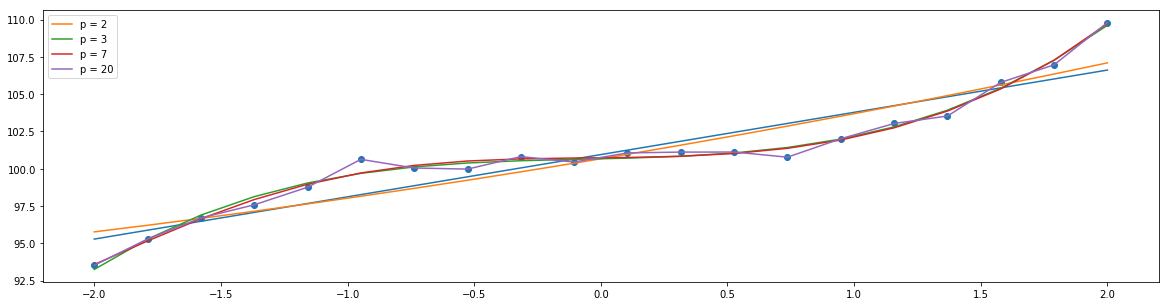

In [17]:
###### Plot lines of best fit for higher order functions

fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.scatter(xx, yy)
ax.plot(xx, xx*lr.coef_ + lr.intercept_)

for i in [2,3,7,20]:
    fit_and_plot_poly_to_degree(xx, yy, i, ax)
plt.legend()

plt.show()

In [18]:
###### Instantiate and Fit Linear Regression on Sales using TV data

lr = LinearRegression()
lr.fit(Advertising[['TV']], Advertising.sales)
lr.coef_, lr.intercept_

(array([0.04753664]), 7.032593549127695)

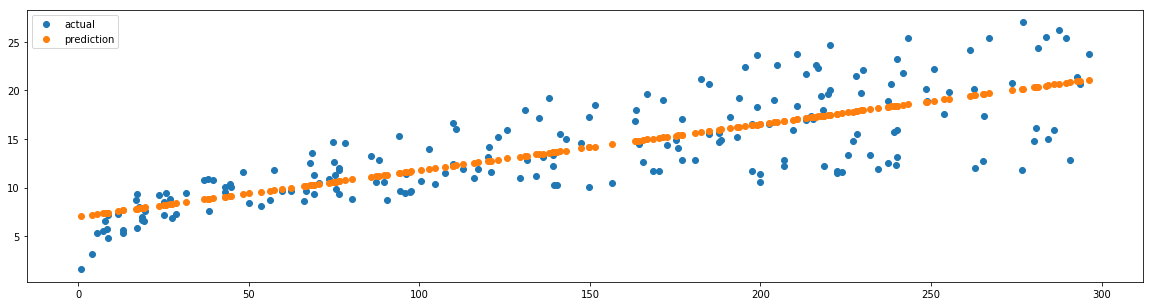

In [19]:
###### Plot line of best fit 

fig, ax = plt.subplots(1,1,figsize=(20,5))

predictions = lr.predict(Advertising[['TV']])

ax.scatter(Advertising.TV, Advertising.sales,
           label='actual')

ax.scatter(Advertising.TV, predictions,
           label='prediction')

plt.legend()

plt.show()

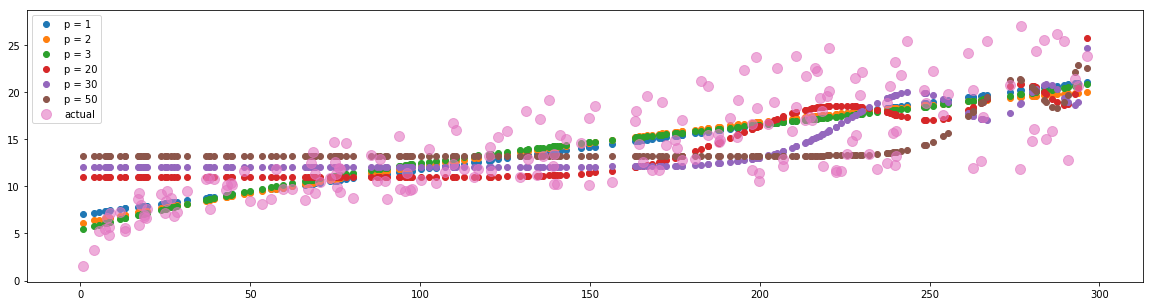

In [20]:
###### Plot higher order lines of best fit

fig, ax = plt.subplots(1,1,figsize=(20,5))

for i in [1,2,3,20,30,50]:
    fit_and_plot_poly_to_degree(
        Advertising.TV, 
        Advertising.sales, 
        i, ax, scatter=True)
    
ax.scatter(Advertising.TV, Advertising.sales, 
           label='actual', s=100, alpha=0.6)

plt.legend()

plt.show()

In general, fitting a more flexible model requires estimating a greater number of parameters. These more complex models can lead to a phenomenon known as **overfitting** the data, which essentially means they follow the errors, or noise, too closely. We can generalize this in terms of model flexibility. In general, less flexible models may overfit, whereas more flexible models may overfit. 

##### The Trade-Off Between Prediction Accuracy and Model Interpretability

We can also think about flexibility and accuracy in terms of our ability to interpret models.

<include type="image"> 

###### Model Flexibility

![](../img/model-flexibility.png)

</include>


Models on the right can often be "black box" models that are difficult to interpret. Their increased flexibility may make them stronger at making accuracte predictions.

Models on the left will be much more simple, but they may also be less accurate.

#### Statistical Learning Domains

1. Supervised Learning
2. Unsupervised Learning
3. Regression
4. Classification
5. Cluster Analysis

Why is it necessary to introduce so many different statistical learning approaches, rather than just a single best method?

**TANSTAAFL**